# Vizualizace dat hitů ze Spotify

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("songs_normalize.csv")

# Průzkum datasetu

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Vypíšeme názvy všech sloupců.

In [4]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

Počet záznamů.

In [5]:
df.count()

artist              2000
song                2000
duration_ms         2000
explicit            2000
year                2000
popularity          2000
danceability        2000
energy              2000
key                 2000
loudness            2000
mode                2000
speechiness         2000
acousticness        2000
instrumentalness    2000
liveness            2000
valence             2000
tempo               2000
genre               2000
dtype: int64

Počet záznamů podle roku.

In [6]:
df.groupby("year").count()["song"]

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: song, dtype: int64

Odstraníme z datasetu všechny roky, které mají méně než 10 hitů. Budeme tedy pracovat s roky 1999 až 2019.

In [7]:
years = df.groupby("year").count()
years = years[years["song"] > 10].index.values
df = df[df["year"].isin(years)]

In [8]:
df.groupby("year").count()["song"]

year
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
Name: song, dtype: int64

# Populární žánry

In [9]:
genres = df.groupby("genre")["song"].count()
# Odstraníme nepopulární žánry
genres = genres[genres.values > 25]
genre_map = dict(zip(genres.index.values, genres.values))
genre_pop = {}
for gs in genre_map:
    for g in gs.split(","):
        g = g.strip()
        if g not in genre_pop:
            genre_pop[g] = 0
        genre_pop[g] += genre_map[gs]

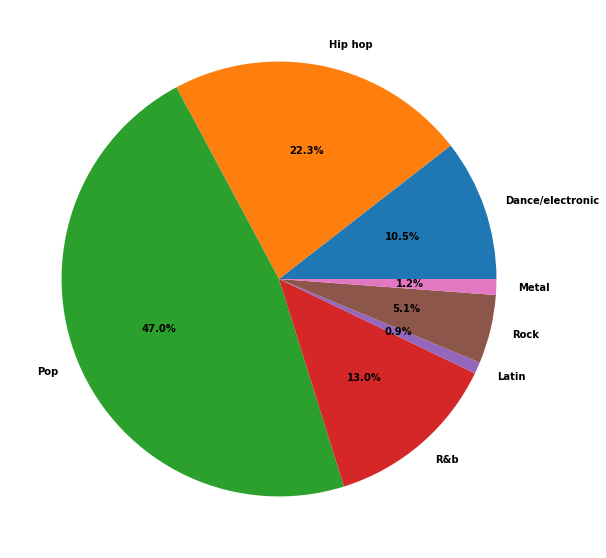

In [10]:
plt.figure(figsize=(10, 10))

labels = [l.capitalize() for l in genre_pop.keys()]

plt.pie(genre_pop.values(), labels=labels, 
        autopct='%1.1f%%', textprops={"weight": "heavy"});

# Nejpopulárnější interpreti podle počtu hitů

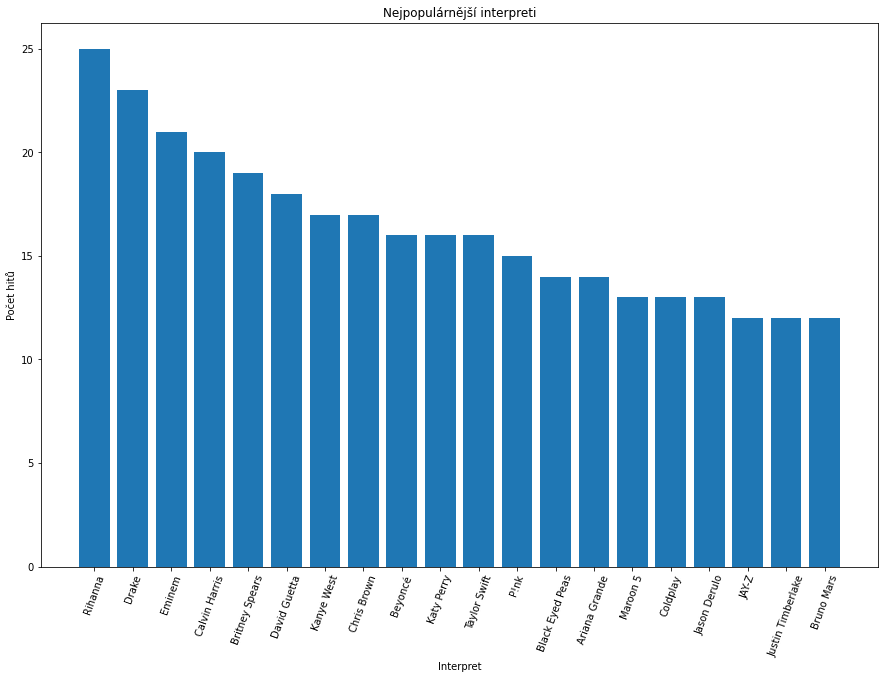

In [11]:
most_popular_artists = df.groupby("artist").count()["song"].sort_values(ascending=False)[:20]

plt.figure(figsize=(15, 10))

plt.title("Nejpopulárnější interpreti")
plt.xlabel("Interpret")
plt.ylabel("Počet hitů")
plt.xticks(range(len(most_popular_artists.index.values)), most_popular_artists.index.values,
          rotation=70)

plt.bar(most_popular_artists.index.values, most_popular_artists.values);

# Korelační matice

Z korelační matice vyčteme, že největší korelace v datech je mezi průměrnou hlasitostí a jak moc je písnička energetická.

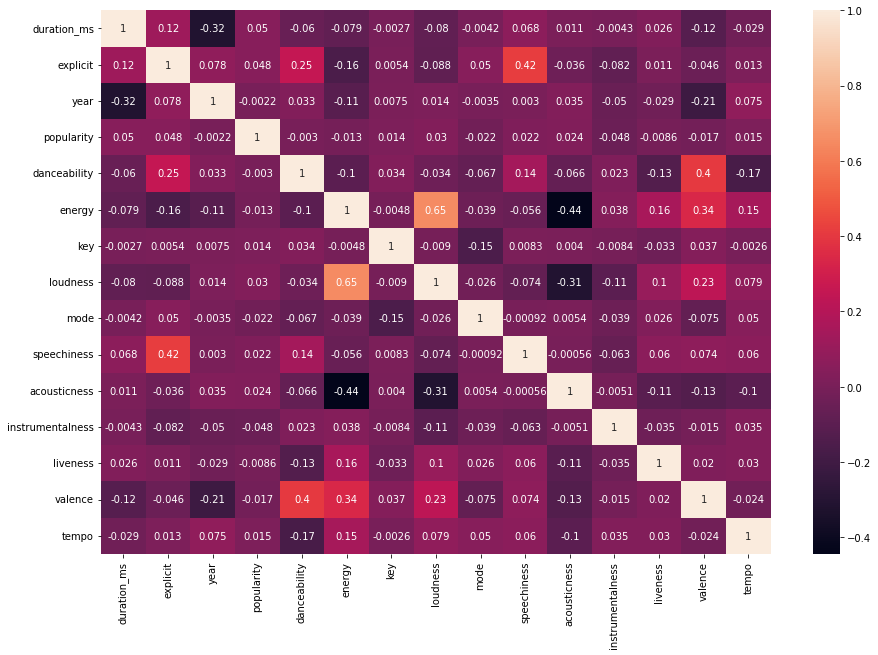

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

# Korelace mezi průměrnou hlasitostí a energetičností hitu

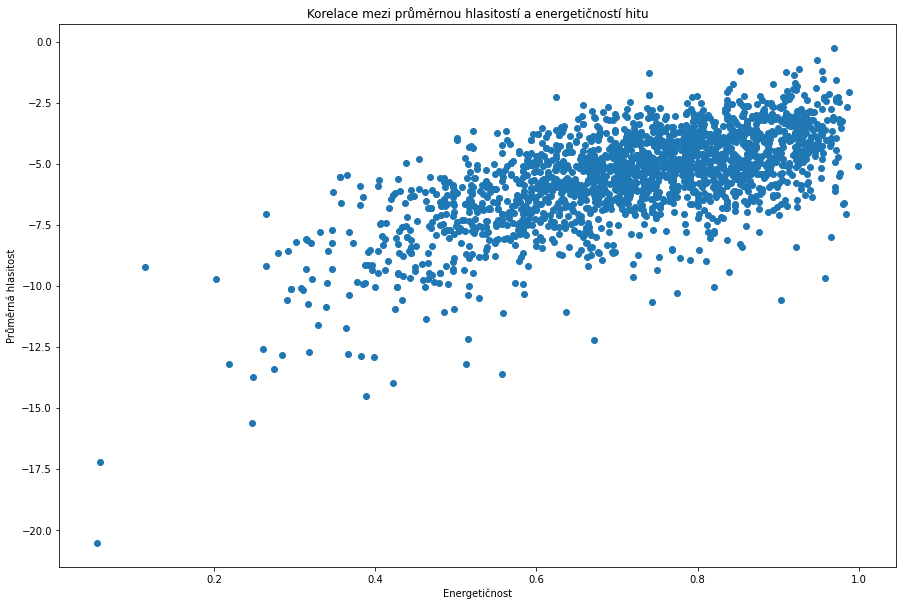

In [13]:
plt.figure(figsize=(15, 10))

plt.title("Korelace mezi průměrnou hlasitostí a energetičností hitu")
plt.xlabel("Energetičnost")
plt.ylabel("Průměrná hlasitost")

plt.scatter(df["energy"], df["loudness"]);

# Hity v letech

Většina aktuálních hitů bylo vytvořeno mezi lety 2001 až 2018, nejvíce v roce 2012.

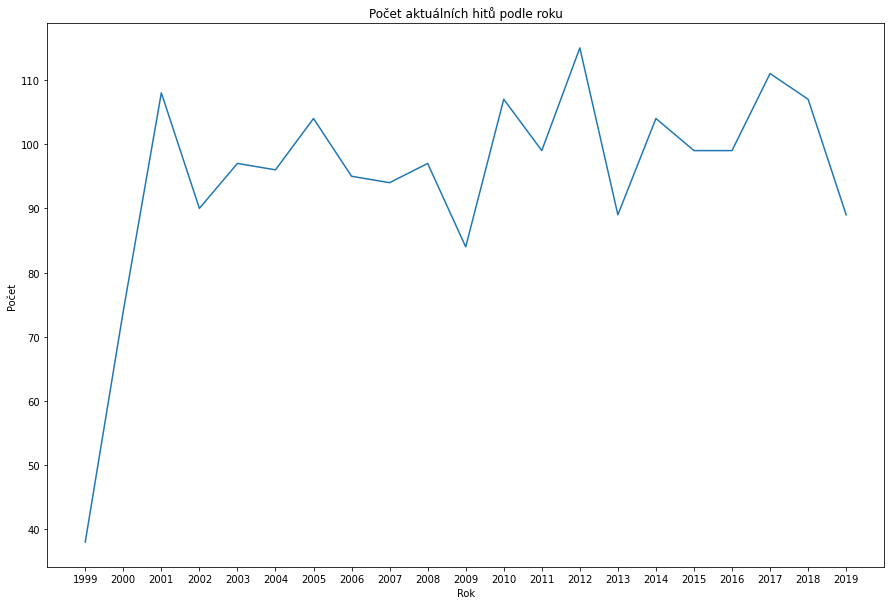

In [20]:
songs_by_year = df.groupby("year").count()["song"]

plt.figure(figsize=(15, 10))

plt.title("Počet aktuálních hitů podle roku")
plt.xlabel("Rok")
plt.ylabel("Počet")
plt.xticks(df["year"].sort_values().unique())

plt.plot(songs_by_year);

# Akustičnost hitů v letech

Akustičnost hitů se v letech pohybuje v podobných hodnotách s možným maximem v roce 2018.

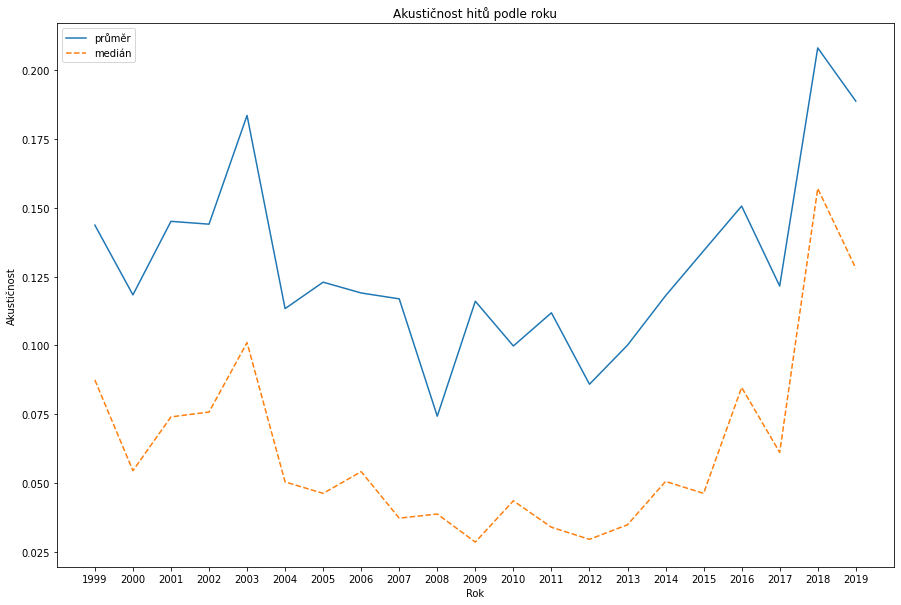

In [15]:
acousticness_by_year = df.groupby("year")["acousticness"]

plt.figure(figsize=(15, 10))
plt.title("Akustičnost hitů podle roku")
plt.xlabel("Rok")
plt.ylabel("Akustičnost")
plt.xticks(df["year"].sort_values().unique())

plt.plot(acousticness_by_year.mean(), label="průměr")
plt.plot(acousticness_by_year.median(), "--", label="medián")

plt.legend();

# Tanečnost hitů v letech

Podle průměrných a mediánových hodnot z grafu, jsou v posledních letech více populární taneční hity.

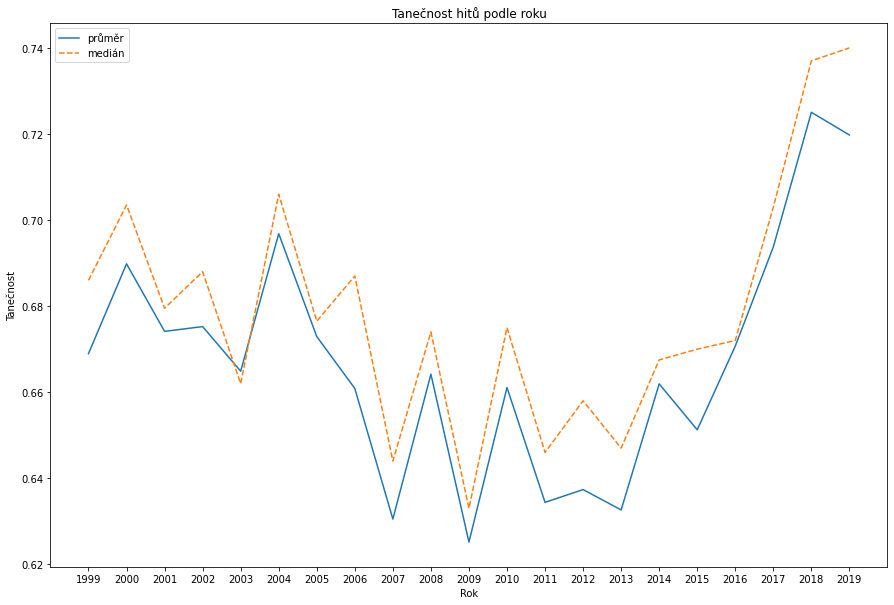

In [16]:
danceability_by_year = df.groupby("year")["danceability"]

plt.figure(figsize=(15, 10))
plt.title("Tanečnost hitů podle roku")
plt.xlabel("Rok")
plt.ylabel("Tanečnost")
plt.xticks(df["year"].sort_values().unique())

plt.plot(danceability_by_year.mean(), label="průměr")
plt.plot(danceability_by_year.median(), "--", label="medián")

plt.legend();

# Vulgárnost hitů v letech

Z grafu můžeme vyčíst, že hity jsou čím dál více vulgárnější, než tomu bylo v předchozích letech.

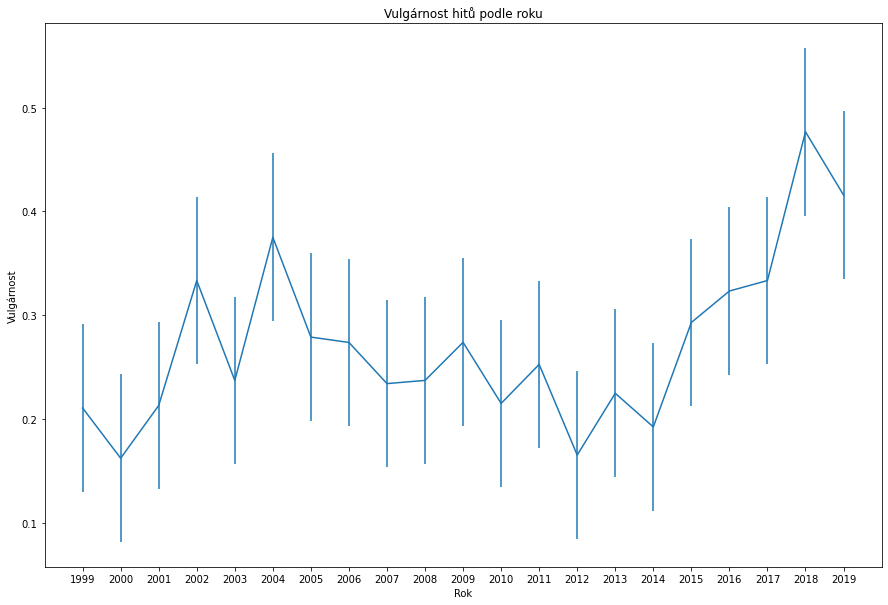

In [17]:
explicitness_by_year = df.groupby("year").mean()["explicit"]

plt.figure(figsize=(15, 10))
plt.title("Vulgárnost hitů podle roku")
plt.xlabel("Rok")
plt.ylabel("Vulgárnost")
plt.xticks(df["year"].sort_values().unique())

plt.errorbar(explicitness_by_year.index.values, explicitness_by_year, explicitness_by_year.std());